**Leonardo Bocchi**

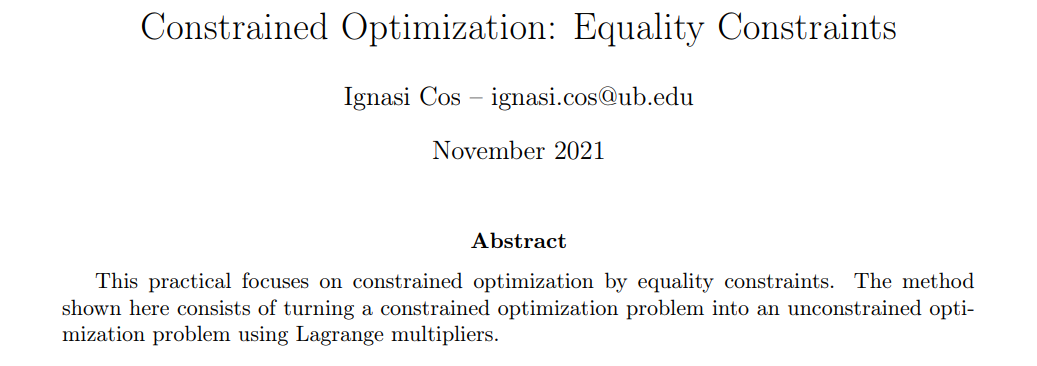

# **Part 1**

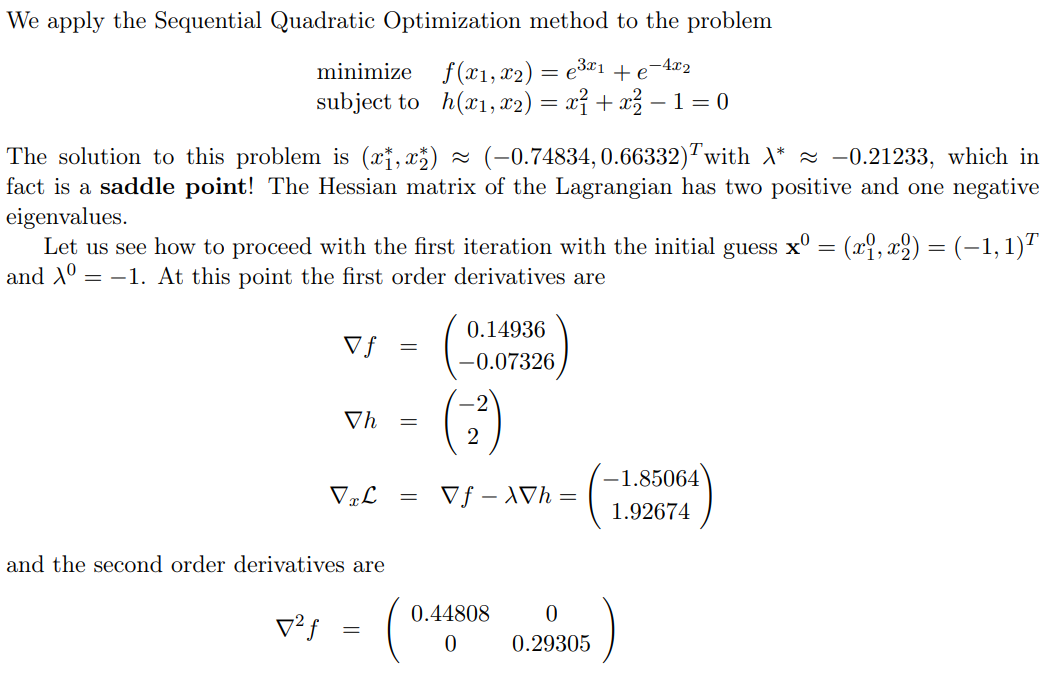

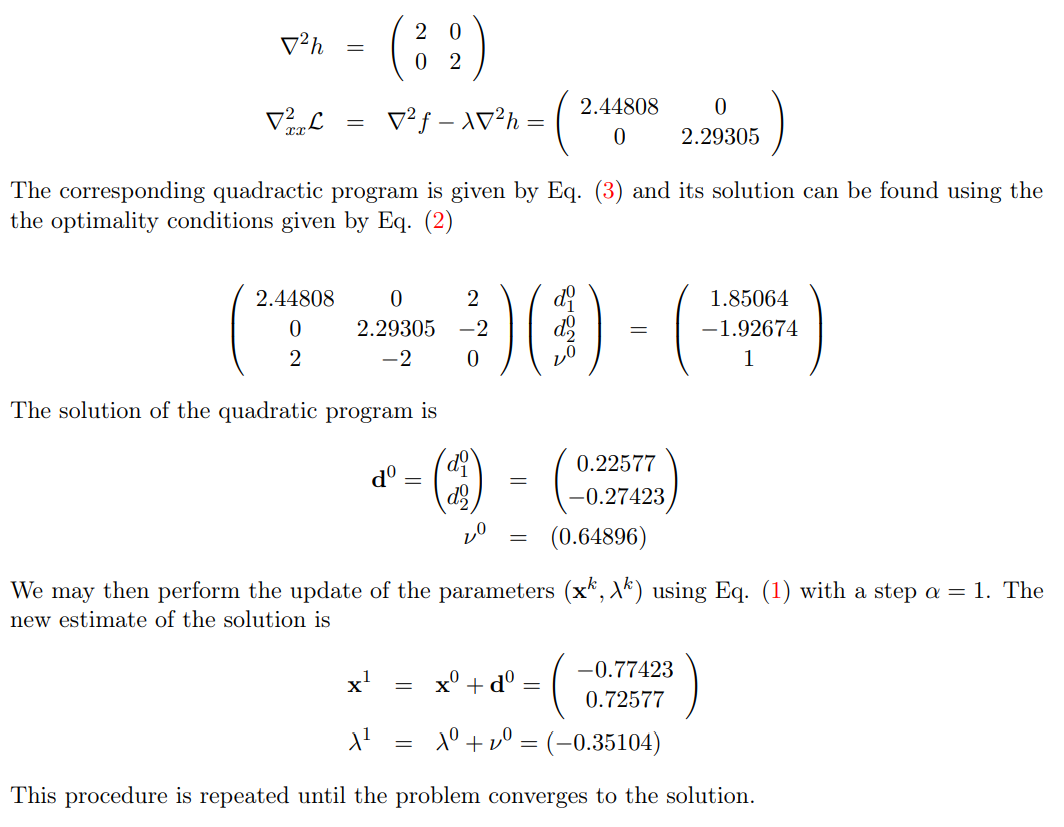

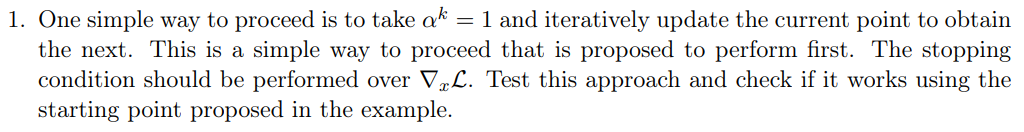

In [21]:
import numpy as np

# Defining f(x) and co. --------------------------------------------------------
def f(x):
  return np.exp(3*x[0])+np.exp(-4*x[1])

def grad_f(x):
  res = np.zeros([2,1])
  res[0] = 3*np.exp(3*x[0])
  res[1] = -4*np.exp(-4*x[1])
  return res

def H_f(x):
  res = np.zeros([2,2])
  res[0,0] = 9*np.exp(3*x[0]) 
  res[1,1] = 16*np.exp(-4*x[1])
  return res

# Defining h(x) and co. --------------------------------------------------------
def h(x):
  return x[0]**2+x[1]**2-1

def grad_h(x):
  res = np.zeros([2,1])
  res[0] = 2*x[0]
  res[1] = 2*x[1]
  return res

def H_h(x):
  res = np.zeros([2,2])
  res[0,0] = 2
  res[1,1] = 2
  return res

# Defining the Lagrangian ------------------------------------------------------
def L(x, lamb):
  return f(x)-lamb*h(x)

def grad_L(x, lamb):
  return grad_f(x)-lamb*grad_h(x)

def H_L(x, lamb):
  return H_f(x)-lamb*H_h(x)

In [34]:
x = np.ones([2,1])
lamb=1
type(grad_f(x)-lamb*grad_h(x))
type(grad_L(x, lamb))

numpy.ndarray

In [22]:
def compose_M(x, lamb): 
  M = np.block([
                [H_L(x, lamb), -grad_h(x) ],
                [-grad_h(x).T, 0          ]
                                          ])
  return M

In [57]:
from numpy.linalg import solve, norm

# Define the method ------------------------------------------------------------
def SQO_method(x0, lamb0, alpha, tol=1e-6):

  # Retrieve the dimenions -----------------------------------------------------
  n = len(x0)

  # Initialization -------------------------------------------------------------
  xk = x0.reshape([2,1])
  lamb = lamb0
  niter = 0

  while norm(grad_L(xk, lamb))>=tol:
    M = compose_M(xk, lamb)
    rhv = np.concatenate((-grad_L(xk, lamb), h(xk).reshape([1,1])), axis=0)
    dk = solve(M, rhv)

    xk = xk + alpha*dk[:n]
    lamb = lamb + alpha*dk[n:]
    niter = niter + 1

  return xk, niter

In [62]:
# Define some parameters -------------------------------------------------------
x0 = np.array([-1, 1]).reshape([2,1])
lamb0 = -1
tol = 1e-6
alpha = 1

# Run the method
xk, niter = SQO_method(x0, lamb0, alpha, tol)
print("The method converges to the solution ", xk.ravel())
print("The method converges in ", niter, " iterations")

The method converges to the solution  [-0.74833549  0.66332043]
The method converges in  4  iterations


# **Part 2**

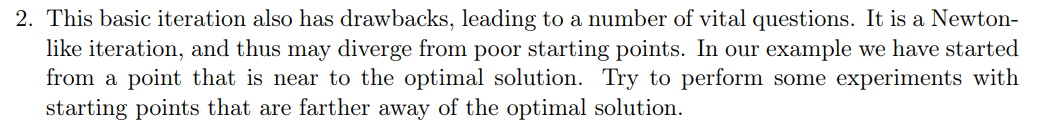

In [174]:
# Generate random initial points -----------------------------------------------
N = 10
initial_values = np.random.rand(N, 2)*5

xk = np.zeros([2, N])
niter = np.zeros(N)
idx = 0

for xy in initial_values:
  xk[:,[idx]], niter[idx] = SQO_method(xy, lamb0, alpha, tol)
  print("The method converges to the solution ", xk[:,[idx]].ravel())
  print("The method converges in ", niter[idx], " iterations")
  idx = idx+1

The method converges to the solution  [-0.74833549  0.66332043]
The method converges in  13.0  iterations
The method converges to the solution  [-0.74833547  0.66332046]
The method converges in  19.0  iterations
The method converges to the solution  [ 0.91041323 -0.41370006]
The method converges in  11.0  iterations
The method converges to the solution  [-0.74833549  0.66332043]
The method converges in  10.0  iterations
The method converges to the solution  [-0.74833549  0.66332044]
The method converges in  8.0  iterations
The method converges to the solution  [-0.74833549  0.66332044]
The method converges in  10.0  iterations
The method converges to the solution  [ 0.91041323 -0.41370008]
The method converges in  20.0  iterations
The method converges to the solution  [ 0.99498259 -0.10004825]
The method converges in  12.0  iterations
The method converges to the solution  [-0.74833549  0.66332043]
The method converges in  16.0  iterations
The method converges to the solution  [ 0.91041

In [175]:
import pandas as pd

# Visualize the result ---------------------------------------------------------
d = {'x0[0]': initial_values[:,0], 'x0[1]': initial_values[:,1], 'Solution[0]': xk[0,:], 'Solution[1]': xk[1,:], 'Iterations': niter}
df = pd.DataFrame(data=d)
df

,x0[0],x0[1],Solution[0],Solution[1],Iterations
0,1.869372,0.984242,-0.748335,0.663320,13.0
1,2.958825,2.990827,-0.748335,0.663320,19.0
2,2.953297,1.108167,0.910413,-0.413700,11.0
3,1.396855,0.098741,-0.748335,0.663320,10.0
4,0.603878,1.531994,-0.748335,0.663320,8.0
5,1.332491,4.110115,-0.748335,0.663320,10.0
6,4.718121,3.026382,0.910413,-0.413700,20.0
7,3.800174,2.878882,0.994983,-0.100048,12.0
8,4.353628,2.182387,-0.748335,0.663320,16.0
9,1.924987,1.382999,0.910413,-0.413700,6.0


**OBSERVATION:** the method converges to different solutions for certain intial values, as we would expect from a Newton-like method

# **Part 3**

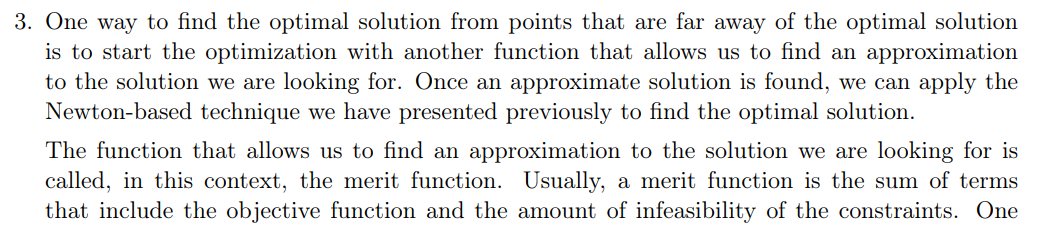

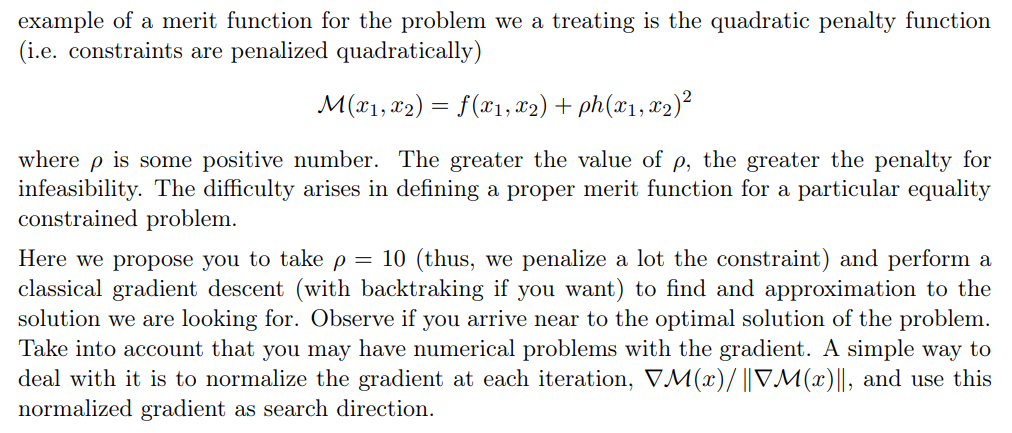

In [176]:
# Define the merit function ----------------------------------------------------
def M(x, ro=10):
  return f(x)+ro*(h(x)**2)

def grad_M(x, ro=10):
  res = np.zeros([2,1])
  res[0] = 3*np.exp(3*x[0]) + 2*ro*2*x[0]
  res[1] = -4*np.exp(-4*x[1]) +2*ro*2*x[1]
  return res

# Define the gradient descent method -------------------------------------------
def grad_des(x0, tol=1e-6):     # Defining a gradient descent method with a non-constant step size
  """ Gradient descent method
  Direction of descent: steepest, alpha: adjusted
  Returns xk (2xk+1), k (number of iterations)
  """

  xk = np.zeros([2,1])
  xk[:,[0]] = x0
  k = 0
  grad = np.ones([2,1])                  # Used to initialize the loop, its actual value gets computed as soon as the while loop begins
  while np.sqrt(grad[0]**2+grad[1]**2)>tol:
    grad = grad_M(xk[:,[k]])
    d = grad/norm(grad)             # Normalized direction of descent
    alpha = 1                       # Initial value of alpha
    xk = np.append(xk, xk[:,[k]] - alpha*d, axis=1)
    while M(xk[:,[k+1]])>M(xk[:,[k]]):            # Backtracking algorithm to adjust alpha_k
      alpha = alpha/2           # Update alpha
      xk[:,[k+1]] = xk[:,[k]] - alpha*d        # Compute xk+1 once again and check if the value of the function has decreased

    if abs(M(xk[:,[k+1]])-M(xk[:,[k]]))<tol*1e-6:
      break
    k = k+1

  return xk, k

Let us run the method to have an approximation of the solution for the previously computed initial values

In [177]:
# Compute the approximated solutions to then use as initial values -------------
approx = np.zeros([2, N])           # Store the values of the obtained approximation
idx = 0

for xy in initial_values:
  xk, niter = grad_des(xy.reshape([2,1]))
  approx[:,[idx]] = xk[:,[-1]]
  idx = idx+1

# Visualize the results --------------------------------------------------------
d = {'x0[0]': initial_values[:,0], 'x0[1]': initial_values[:,1], 'Approximation[0]': approx[0,:], 'Approximation[1]': approx[1,:]}
df = pd.DataFrame(data=d)
df

,x0[0],x0[1],Approximation[0],Approximation[1]
0,1.869372,0.984242,-0.025544,0.495979
1,2.958825,2.990827,0.046901,0.887655
2,2.953297,1.108167,0.049090,0.641539
3,1.396855,0.098741,-0.602374,0.054849
4,0.603878,1.531994,0.033780,0.710418
5,1.332491,4.110115,-0.027381,0.562763
6,4.718121,3.026382,0.051925,0.949473
7,3.800174,2.878882,0.045596,0.893948
8,4.353628,2.182387,0.064882,0.868012
9,1.924987,1.382999,0.077612,0.801318


Let us compute the distance of the approximations from the actual solution

In [178]:
# Compute the distance ---------------------------------------------------------
x_exact = np.array([-0.748335,	0.663320]).reshape([2,1])
dist = np.zeros(N)

for idx in range(0, N):
  dist[idx] = norm(approx[:,[idx]]-x_exact)

# Visualize the results --------------------------------------------------------
d = {'x0[0]': initial_values[:,0], 'x0[1]': initial_values[:,1], 'Approximation[0]': approx[0,:], 'Approximation[1]': approx[1,:], 'Distance': dist}
df = pd.DataFrame(data=d)
df

,x0[0],x0[1],Approximation[0],Approximation[1],Distance
0,1.869372,0.984242,-0.025544,0.495979,0.741909
1,2.958825,2.990827,0.046901,0.887655,0.826273
2,2.953297,1.108167,0.049090,0.641539,0.797722
3,1.396855,0.098741,-0.602374,0.054849,0.625733
4,0.603878,1.531994,0.033780,0.710418,0.783532
5,1.332491,4.110115,-0.027381,0.562763,0.727933
6,4.718121,3.026382,0.051925,0.949473,0.849882
7,3.800174,2.878882,0.045596,0.893948,0.826750
8,4.353628,2.182387,0.064882,0.868012,0.838583
9,1.924987,1.382999,0.077612,0.801318,0.837396


**OBSERVATION:** The obtained approximations are pretty close to the exact solutions, meaning they seem to be good initial values to be used in order to find the solution using the Sequential Quadratic Optimization method

# **Part 4**

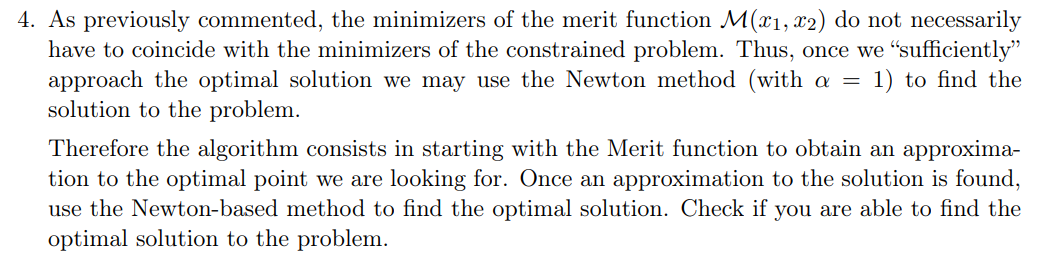

Let us now run the Sequential Quadratic Optimization method using the newly computed initial values, which will, hoepfully, be close enough to the solution for the method to converge to it

In [179]:
# Run the method ---------------------------------------------------------------
xk = np.zeros([2, N])
niter = np.zeros(N)

for idx in range(0, N):
  xk[:,[idx]], niter[idx] = SQO_method(approx[:,idx], lamb0, alpha, tol)

# Visualize the results --------------------------------------------------------
d = {'x0[0]': approx[0,:], 'x0[1]': approx[1,:], 'Solution[0]': xk[0,:], 'Solution[1]': xk[1,:], 'Iterations': niter}
df = pd.DataFrame(data=d)
df

,x0[0],x0[1],Solution[0],Solution[1],Iterations
0,-0.025544,0.495979,-0.748335,0.663320,9.0
1,0.046901,0.887655,-0.748335,0.663320,6.0
2,0.049090,0.641539,-0.748335,0.663320,7.0
3,-0.602374,0.054849,-0.748335,0.663320,6.0
4,0.033780,0.710418,-0.748335,0.663321,6.0
5,-0.027381,0.562763,-0.748336,0.663320,9.0
6,0.051925,0.949473,-0.748335,0.663320,6.0
7,0.045596,0.893948,-0.748335,0.663320,6.0
8,0.064882,0.868012,-0.748335,0.663320,6.0
9,0.077612,0.801318,-0.748335,0.663321,6.0


To sum everything up, let us define a function that, given any initial value, computes a good approximation of the solution, using the gradient descent method on the merit function, and then computes the solution, starting from the approximation, using the Sequential Quadratic Optimization method

In [180]:
def SQO_complete(x0, lamb0=1, alpha=1, tol=1e-6):

  # Retrieve the dimenions -----------------------------------------------------
  n = len(x0)

  # Initialization -------------------------------------------------------------
  x0 = x0.reshape([2,1])
  xk = x0+1                     # Used for initialization
  grad = np.ones([2,1])                  # Used to initialize the loop, its actual value gets computed as soon as the while loop begins
  lamb = lamb0

  # Approximation of the solution ----------------------------------------------
  while np.sqrt(grad[0]**2+grad[1]**2)>tol and abs(M(xk)-M(x0))>tol:
    grad = grad_M(x0)
    d = grad/norm(grad)             # Normalized direction of descent
    alp = 1                       # Initial value of alpha
    xk = x0 - alp*d
    while M(xk)>M(x0):            # Backtracking algorithm to adjust alpha_k
      alp = alp/2           # Update alpha
      xk = x0 - alp*d        # Compute xk+1 once again and check if the value of the function has decreased
    x0 = xk

  # Sequential Quadratic Optimization method -----------------------------------
  while norm(grad_L(xk, lamb))>=tol:
    Mat = compose_M(xk, lamb)
    rhv = np.concatenate((-grad_L(xk, lamb), h(xk).reshape([1,1])), axis=0)
    dk = solve(Mat, rhv)

    xk = xk + alpha*dk[:n]
    lamb = lamb + alpha*dk[n:]

  return xk

In [183]:
# Run the method on the generated initial values -------------------------------
xk = np.zeros([2, N])
idx = 0

for xy in initial_values:
  xk[:,[idx]] = SQO_complete(xy)
  print("The method converges to the solution ", xk[:,[idx]].ravel())
  idx = idx+1

The method converges to the solution  [-0.74833549  0.66332043]
The method converges to the solution  [-0.74833549  0.66332044]
The method converges to the solution  [-0.74833549  0.66332043]
The method converges to the solution  [-0.74833573  0.66332025]
The method converges to the solution  [-0.74833549  0.66332043]
The method converges to the solution  [-0.74833549  0.66332043]
The method converges to the solution  [-0.74833549  0.66332044]
The method converges to the solution  [ 0.91041323 -0.41370007]
The method converges to the solution  [-0.74833549  0.66332043]
The method converges to the solution  [-0.74833549  0.66332043]


# **Example of Variational Calculus: movement of a particle**

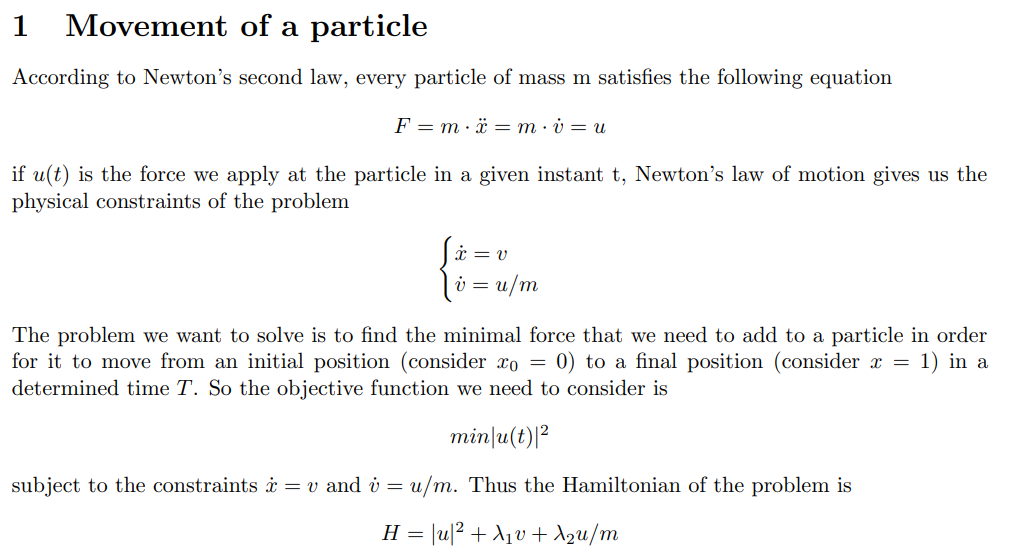

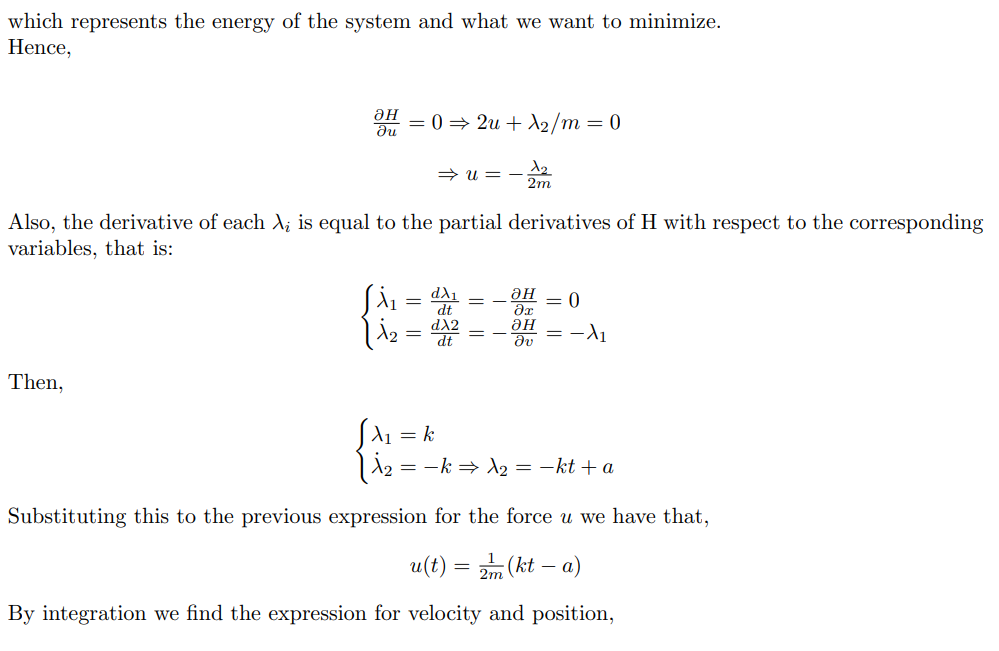

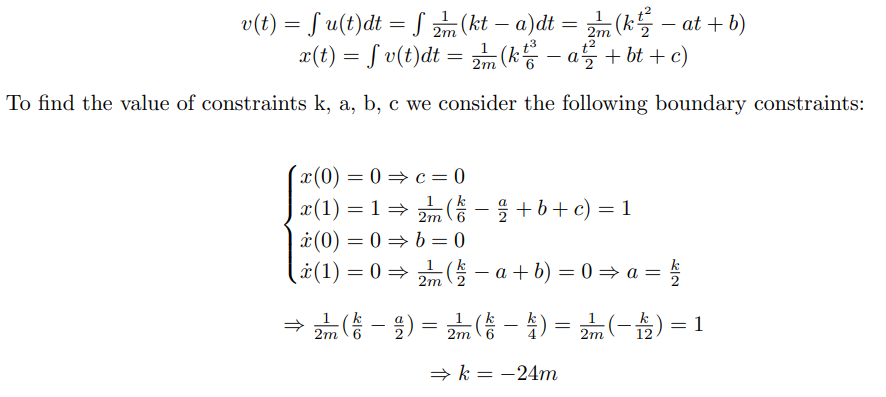

By substitution we obtain the expressions for x(t) and u(t)

Let us define the obtained expressions for x(t) and u(t) as functions

In [6]:
def x(t):
  return -2*(t**3)+3*(t**2)

def u(t, m):
  return 6*m*(1-2*t)

Plotting the resulting functions

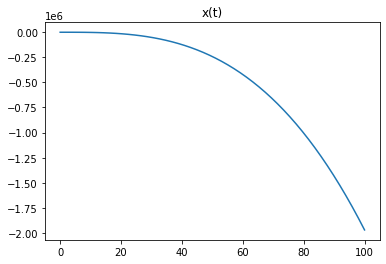

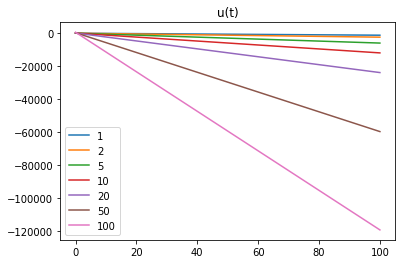

In [7]:
import numpy as np
import matplotlib.pyplot as plt

tt = np.linspace(0,100)
M = [1, 2, 5, 10, 20, 50, 100]

plt.figure()
plt.title("x(t)")
plt.plot(tt, x(tt))

plt.figure()
plt.title("u(t)")
for m in M:
  plt.plot(tt, u(tt, m), label=m)
plt.legend()